# Hadamard Test

2 problems:
1 linear combination dual
1 phase RE and IM

$(\boldsymbol{a} + \boldsymbol{b})^T(\boldsymbol{a}+\boldsymbol{b}) = \sum_{i}(a_i+b_i)^2 = \sum_{i}a_i^2 + \sum_{i}b_i^2 + 2\sum_{i}a_ib_i = 2  +2\boldsymbol{a}^T\boldsymbol{b}$

In [1]:
from sympy.physics.quantum.qubit import Qubit, measure_partial, \
    matrix_to_qubit
from sympy.physics.quantum import TensorProduct, Dagger
from sympy.physics.quantum.gate import HadamardGate, CGate, XGate, \
    PhaseGate, H, S
from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.represent import represent
from sympy import re, im
from sympy.physics.quantum.circuitplot import CircuitPlot
from sympy import nsimplify

In [2]:
def inner_sandwitch(phi, U):

    r = Dagger(phi) * U(0) * phi
    print(r)
    r = qapply(r)
    r = r.doit().evalf()
    print(f"Inner prod={r}")
    return r

In [3]:
def hadamard_test_re(phi, U):
    print("Hadamard Test Re")
    ancilla = Qubit(0)
    state = TensorProduct(ancilla, phi)
    # *note that qubits are indexed from right to left*
    c = H(1) * CGate(1, U(0)) * H(1) * state
    CircuitPlot(c, 2)
    print(f"\tc={c}")

    c = qapply(c)
    c = matrix_to_qubit(represent(c))
    print(f"\tc={c}")

    measure = measure_partial(c, [1])
    print(f"\tmeasure={measure}")

    re = 2 * measure[0][1] - 1
    print(f"\tre={re.evalf()}")
    return re

In [4]:
def hadamard_test_im(phi, U):
    print("Hadamard Test Im")
    ancilla = Qubit(0)
    state = TensorProduct(ancilla, phi)
    # *note that qubits are indexed from right to left*
    c = H(1) * S(1) * CGate(1, U(0)) * H(1) * state
    print(f"\tc={c}")

    c = qapply(c)
    c = matrix_to_qubit(represent(c))
    print(f"\tc={c}")

    measure = measure_partial(c, [1])
    print(f"\tmeasure={measure}")

    im = 2 * measure[0][1] - 1
    print(f"\tim={im.evalf()}")
    return im

In [5]:
def check(inner, re_h, im_h):
    assert (
        nsimplify(re(inner).evalf() - re_h.evalf(),
                  tolerance=1e-10, rational=True) == 0
    )
    assert (
        nsimplify(im(inner).evalf() - im_h.evalf(),
                  tolerance=1e-10, rational=True) == 0
    )

## Test 1 U = HGate 

we calculate $\bra{0}H\ket{0} = 1/sqrt(2)$

<0|*H(0)*|0>
Inner prod=0.707106781186548
Hadamard Test Re
	c=H(1)*C((1),H(0))*H(1)*|0>x|0>
	c=sqrt(2)*|00>/4 + |00>/2 + sqrt(2)*|01>/4 - sqrt(2)*|10>/4 + |10>/2 - sqrt(2)*|11>/4
	measure=[(sqrt(sqrt(2)/4 + 1/2)*|00> + sqrt(2)*|01>/(4*sqrt(sqrt(2)/4 + 1/2)), 1/(8*((1/2 - sqrt(2)/4)**2 + 1/4 + (sqrt(2)/4 + 1/2)**2)) + (sqrt(2)/4 + 1/2)**2/((1/2 - sqrt(2)/4)**2 + 1/4 + (sqrt(2)/4 + 1/2)**2)), (sqrt(1/2 - sqrt(2)/4)*|10> - sqrt(2)*|11>/(4*sqrt(1/2 - sqrt(2)/4)), (1/2 - sqrt(2)/4)**2/((1/2 - sqrt(2)/4)**2 + 1/4 + (sqrt(2)/4 + 1/2)**2) + 1/(8*((1/2 - sqrt(2)/4)**2 + 1/4 + (sqrt(2)/4 + 1/2)**2)))]
	re=0.707106781186548
Hadamard Test Im
	c=H(1)*S(1)*C((1),H(0))*H(1)*|0>x|0>
	c=|00>/2 + sqrt(2)*I*|00>/4 + sqrt(2)*I*|01>/4 + |10>/2 - sqrt(2)*I*|10>/4 - sqrt(2)*I*|11>/4
	measure=[(sqrt(2)*|00>/2 + I*|00>/2 + I*|01>/2, 1/8 + (1/2 - sqrt(2)*I/4)*(1/2 + sqrt(2)*I/4)), (sqrt(2)*|10>/2 - I*|10>/2 - I*|11>/2, 1/8 + (1/2 - sqrt(2)*I/4)*(1/2 + sqrt(2)*I/4))]
	im=-0E-138


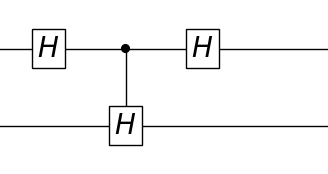

In [6]:
U = HadamardGate
phi = Qubit(0)
inner = inner_sandwitch(phi, U)
re_h = hadamard_test_re(phi, U)
im_h = hadamard_test_im(phi, U)

check(inner, re_h, im_h)

## Test: U = XGate

we calculate $\bra{0}X\ket{0} = \bra{0}\ket{1} = 0$

<1|*X(0)*|1>
Inner prod=0
Hadamard Test Re
	c=H(1)*C((1),X(0))*H(1)*|0>x|1>
	c=|00>/2 + |01>/2 - |10>/2 + |11>/2
	measure=[(sqrt(2)*|00>/2 + sqrt(2)*|01>/2, 1/2), (-sqrt(2)*|10>/2 + sqrt(2)*|11>/2, 1/2)]
	re=0
Hadamard Test Im
	c=H(1)*S(1)*C((1),X(0))*H(1)*|0>x|1>
	c=I*|00>/2 + |01>/2 - I*|10>/2 + |11>/2
	measure=[(sqrt(2)*I*|00>/2 + sqrt(2)*|01>/2, 1/2), (-sqrt(2)*I*|10>/2 + sqrt(2)*|11>/2, 1/2)]
	im=0


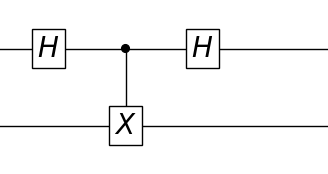

In [7]:
U = XGate
phi = Qubit(1)
inner = inner_sandwitch(phi, U)
re_h = hadamard_test_re(phi, U)
im_h = hadamard_test_im(phi, U)

check(inner, re_h, im_h)

we calculate $\bra{1/sqrt(2)*(\ket{0} + \ket{1})}X\ket{1/sqrt(2)*(\ket{0} + \ket{1}} = 1$

(sqrt(2)*<0|/2 + sqrt(2)*<1|/2)*X(0)*(sqrt(2)*|0>/2 + sqrt(2)*|1>/2)
Inner prod=1.00000000000000
Hadamard Test Re
	c=H(1)*C((1),X(0))*H(1)*|0>x(sqrt(2)*|0>/2 + sqrt(2)*|1>/2)
	c=sqrt(2)*|00>/2 + sqrt(2)*|01>/2
	measure=[(sqrt(2)*|00>/2 + sqrt(2)*|01>/2, 1)]
	re=1.00000000000000
Hadamard Test Im
	c=H(1)*S(1)*C((1),X(0))*H(1)*|0>x(sqrt(2)*|0>/2 + sqrt(2)*|1>/2)
	c=sqrt(2)*|00>/4 + sqrt(2)*I*|00>/4 + sqrt(2)*|01>/4 + sqrt(2)*I*|01>/4 + sqrt(2)*|10>/4 - sqrt(2)*I*|10>/4 + sqrt(2)*|11>/4 - sqrt(2)*I*|11>/4
	measure=[(|00>/2 + I*|00>/2 + |01>/2 + I*|01>/2, 2*(sqrt(2)/4 - sqrt(2)*I/4)*(sqrt(2)/4 + sqrt(2)*I/4)), (|10>/2 - I*|10>/2 + |11>/2 - I*|11>/2, 2*(sqrt(2)/4 - sqrt(2)*I/4)*(sqrt(2)/4 + sqrt(2)*I/4))]
	im=-0E-140


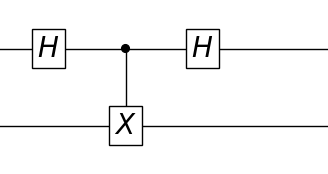

In [8]:
U = XGate
phi = qapply(HadamardGate(0) * Qubit(0))
inner = inner_sandwitch(phi, U)
re_h = hadamard_test_re(phi, U)
im_h = hadamard_test_im(phi, U)

check(inner, re_h, im_h)

## Test: U = PhaseGate

we calculate $\bra{0}S\ket{0} = 1$

<0|*S(0)*|0>
Inner prod=1.00000000000000
Hadamard Test Re
	c=H(1)*C((1),S(0))*H(1)*|0>x|0>
	c=|00>
	measure=[(|00>, 1)]
	re=1.00000000000000
Hadamard Test Im
	c=H(1)*S(1)*C((1),S(0))*H(1)*|0>x|0>
	c=|00>/2 + I*|00>/2 + |10>/2 - I*|10>/2
	measure=[(sqrt(2)*|00>/2 + sqrt(2)*I*|00>/2, (1/2 - I/2)*(1/2 + I/2)), (sqrt(2)*|10>/2 - sqrt(2)*I*|10>/2, (1/2 - I/2)*(1/2 + I/2))]
	im=0E-125


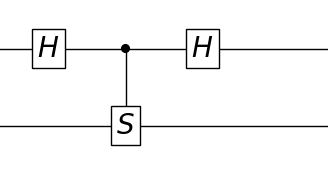

In [9]:
U = PhaseGate
phi = Qubit(0)
inner = inner_sandwitch(phi, U)
re_h = hadamard_test_re(phi, U)
im_h = hadamard_test_im(phi, U)

check(inner, re_h, im_h)

we calculate $\bra{1}S\ket{1} = I$

<1|*S(0)*|1>
Inner prod=1.0*I
Hadamard Test Re
	c=H(1)*C((1),S(0))*H(1)*|0>x|1>
	c=|01>/2 + I*|01>/2 + |11>/2 - I*|11>/2
	measure=[(sqrt(2)*|01>/2 + sqrt(2)*I*|01>/2, (1/2 - I/2)*(1/2 + I/2)), (sqrt(2)*|11>/2 - sqrt(2)*I*|11>/2, (1/2 - I/2)*(1/2 + I/2))]
	re=0E-125
Hadamard Test Im
	c=H(1)*S(1)*C((1),S(0))*H(1)*|0>x|1>
	c=|11>
	measure=[(|11>, 1)]
	im=1.00000000000000


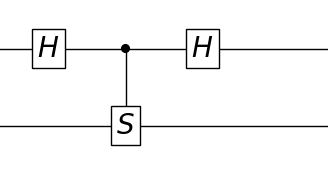

In [10]:
U = PhaseGate
phi = Qubit(1)
inner = inner_sandwitch(phi, U)
re_h = hadamard_test_re(phi, U)
im_h = hadamard_test_im(phi, U)

check(inner, re_h, im_h)